In [14]:
# data manipulations
import numpy as np
import pandas as pd
# progress bar
from tqdm.notebook import tqdm_notebook
# audio analysis
import librosa
# noise reducer
import noisereduce as nr
# standardization
from sklearn.preprocessing import StandardScaler

In [15]:
metadata = pd.read_csv("to_load.csv")
metadata.head()

path      label  samplingrate  \
0  ./Labelled/Bleatings/evt_000_000_000681_210415...  Bleatings         16000   
1  ./Labelled/Bleatings/evt_000_000_000682_210415...  Bleatings         16000   
2  ./Labelled/Bleatings/evt_000_000_000683_210415...  Bleatings         16000   
3  ./Labelled/Bleatings/evt_000_000_000684_210415...  Bleatings         16000   
4  ./Labelled/Bleatings/evt_000_000_002434_210416...  Bleatings         16000   

   nframes       ms  
0   156016   9751.0  
1    99040   6190.0  
2    97152   6072.0  
3    97696   6106.0  
4   164224  10264.0

In [16]:
sr = metadata["samplingrate"][0]
sr

16000

In [17]:
paths = metadata["path"]
samples = []
for path in tqdm_notebook(paths):
    sample, sampling_rate = librosa.load(path, sr=None, mono=True)
    samples.append(sample)
samples[:5]

  0%|          | 0/827 [00:00<?, ?it/s]

[array([ 0.01379395,  0.00057983,  0.01922607, ..., -0.01580811,
        -0.01345825, -0.01861572], dtype=float32),
 array([-0.01376343, -0.00183105,  0.00115967, ...,  0.02661133,
         0.02331543,  0.01779175], dtype=float32),
 array([-2.3986816e-02, -9.6130371e-03, -1.3641357e-02, ...,
        -1.0070801e-02,  6.1035156e-05,  4.5776367e-03], dtype=float32),
 array([-0.01174927, -0.00735474, -0.00198364, ..., -0.00079346,
         0.00054932, -0.00073242], dtype=float32),
 array([ 0.05810547,  0.0345459 ,  0.0211792 , ..., -0.07623291,
         0.03268433,  0.13360596], dtype=float32)]

# Preprocessing

## Segment the long sample

Let's break all the sample above of 5 seconds in subsample with a window 5 of seconds and hop size 2.5 seconds 

In [18]:
condition = metadata["ms"] > 5000
long = metadata[condition]
long

path      label  \
0    ./Labelled/Bleatings/evt_000_000_000681_210415...  Bleatings   
1    ./Labelled/Bleatings/evt_000_000_000682_210415...  Bleatings   
2    ./Labelled/Bleatings/evt_000_000_000683_210415...  Bleatings   
3    ./Labelled/Bleatings/evt_000_000_000684_210415...  Bleatings   
4    ./Labelled/Bleatings/evt_000_000_002434_210416...  Bleatings   
..                                                 ...        ...   
822  ./Labelled/Others/evt_003_003_069816_210609_06...     Others   
823  ./Labelled/Others/evt_003_003_069817_210609_06...     Others   
824  ./Labelled/Others/evt_003_003_069818_210609_06...     Others   
825  ./Labelled/Others/evt_003_003_069819_210609_06...     Others   
826  ./Labelled/Others/evt_003_003_069820_210609_06...     Others   

     samplingrate  nframes       ms  
0           16000   156016   9751.0  
1           16000    99040   6190.0  
2           16000    97152   6072.0  
3           16000    97696   6106.0  
4           16000   164224  10264.0  
..            ...      ...      ...  
822         16000   228400  14275.0  
823         16000    97568   6098.0  
824         16000   119280   7455.0  
825         16000    96448   6028.0  
826         16000   205648  12853.0  

[827 rows x 5 columns]

## Denoising and trimming

Next we take all the signals and apply them noisereduce and trim the resulting signal.

In [8]:
denoise_trim = []
labels = metadata["label"]

for count, sample in tqdm_notebook(enumerate(samples)):
    if labels[count] != "Others":
        sample = nr.reduce_noise(y=sample, sr=sr, use_tqdm=False)
    sample = librosa.effects.trim(sample, top_db=15, frame_length=512, hop_length=64)[0]
    denoise_trim.append(sample)
denoise_trim[:5]

0it [00:00, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[array([0.00220082, 0.00575592, 0.00720868, ..., 0.01353519, 0.0097192 ,
        0.01236091], dtype=float32),
 array([-0.0211998 , -0.00670702, -0.00404559, ...,  0.00080082,
        -0.00095682,  0.00671046], dtype=float32),
 array([-0.00849715, -0.00125245,  0.00614483, ...,  0.01157049,
         0.00784163,  0.0039851 ], dtype=float32),
 array([-0.01474359, -0.01563367, -0.01657681, ..., -0.00084175,
        -0.00015984, -0.00017374], dtype=float32),
 array([ 0.00652769,  0.00209248,  0.00062362, ..., -0.03258326,
         0.01104594,  0.05727492], dtype=float32)]

Update metadata with the trimmed values

In [9]:
metadata_clean = []

for sample in denoise_trim:
    nframe = len(sample)
    length = nframe/sr*1000
    metadata_clean.append([nframe, length])

metadata = pd.concat([metadata, pd.DataFrame(metadata_clean, columns = ["nframes_trim", "ms_trim"])], axis=1)
metadata

path      label  \
0    ./Labelled/Bleatings/evt_000_000_000681_210415...  Bleatings   
1    ./Labelled/Bleatings/evt_000_000_000682_210415...  Bleatings   
2    ./Labelled/Bleatings/evt_000_000_000683_210415...  Bleatings   
3    ./Labelled/Bleatings/evt_000_000_000684_210415...  Bleatings   
4    ./Labelled/Bleatings/evt_000_000_002434_210416...  Bleatings   
..                                                 ...        ...   
822  ./Labelled/Others/evt_003_003_069816_210609_06...     Others   
823  ./Labelled/Others/evt_003_003_069817_210609_06...     Others   
824  ./Labelled/Others/evt_003_003_069818_210609_06...     Others   
825  ./Labelled/Others/evt_003_003_069819_210609_06...     Others   
826  ./Labelled/Others/evt_003_003_069820_210609_06...     Others   

     samplingrate  nframes       ms  nframes_trim  ms_trim  
0           16000   156016   9751.0         75776   4736.0  
1           16000    99040   6190.0         77824   4864.0  
2           16000    97152   6072.0         84096   5256.0  
3           16000    97696   6106.0         69632   4352.0  
4           16000   164224  10264.0        164224  10264.0  
..            ...      ...      ...           ...      ...  
822         16000   228400  14275.0        187328  11708.0  
823         16000    97568   6098.0         97024   6064.0  
824         16000   119280   7455.0        118784   7424.0  
825         16000    96448   6028.0         96000   6000.0  
826         16000   205648  12853.0        205648  12853.0  

[827 rows x 7 columns]

count       827.000000
mean      13294.934704
std       12527.100962
min        6006.000000
25%        6250.000000
50%        8658.000000
75%       14137.000000
max      126324.000000
Name: ms, dtype: float64

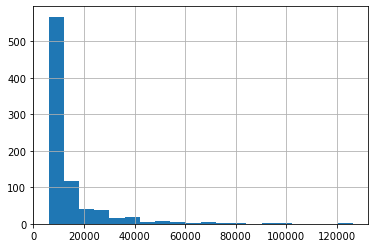

In [10]:
durations = metadata['ms']
durations.hist(bins=20)
durations.describe()

In [11]:
# printing results and listening
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa.display

def wave_and_audio(sample, sr):
    # plot the signal
    plt.figure(figsize=(10, 4))
    librosa.display.waveplot(sample, sr=sr)
    plt.title('Waveplot of audio sample')
    plt.show()
    # reproduce the sample
    ipd.display(ipd.Audio(sample, rate=sr))
    
max_index = metadata["ms"].idxmax()
max_elem = metadata.iloc[max_index]
max_elem

path            ./Labelled/ContactCalls/evt_001_004_035190_210...
label                                                ContactCalls
samplingrate                                                16000
nframes                                                   2021184
ms                                                       126324.0
nframes_trim                                               893504
ms_trim                                                   55844.0
Name: 403, dtype: object

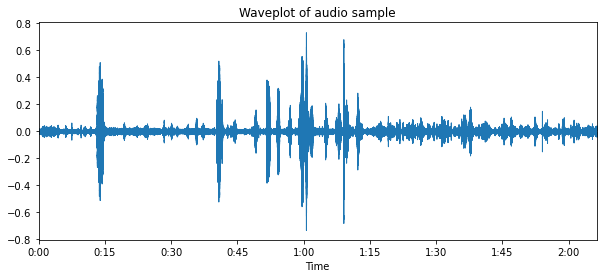

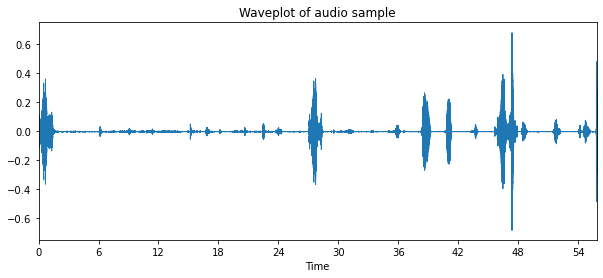

In [12]:
wave_and_audio(samples[403], sr)    
wave_and_audio(denoise_trim[403], sr)    

## Trim the sequences

Now we transfrom all the samples to the same lenghts. Zero padding

## Data augmentation

# Features MFCC and Delta-MFCC

Let's extract as presented in analysis.ipybn the MFCC and delta-MFCC realted features

In [65]:
features = []
for sample in tqdm_notebook(denoise_trim):
    mfccs = librosa.feature.mfcc(sample, sr = sr, n_mfcc=20)
    mfccs_trunc = np.hstack((np.mean(mfccs, axis=1), np.std(mfccs, axis=1), np.max(mfccs, axis = 1),
                             np.median(mfccs, axis = 1), np.min(mfccs, axis = 1)))
    mfccs_delta = librosa.feature.delta(mfccs, mode='nearest')
    mfccs_delta_trunc = np.hstack((np.mean(mfccs_delta, axis=1), np.std(mfccs_delta, axis=1), np.max(mfccs_delta, axis = 1),
                                   np.median(mfccs_delta, axis = 1), np.min(mfccs_delta, axis = 1)))
    features.append(np.concatenate((mfccs_trunc, mfccs_delta_trunc)))

np.shape(features)

  0%|          | 0/827 [00:00<?, ?it/s]

C:\Users\Nicolas Facchinetti\.conda\envs\progapr\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1536
  warnings.warn(
C:\Users\Nicolas Facchinetti\.conda\envs\progapr\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1856
  warnings.warn(


Then we can standardize the values obtained to have all the values on the same scale

In [85]:
scaler = StandardScaler()
scaled = scaler.fit_transform(features)

array([[ 0.34781968,  0.15523269, -0.23216898, ..., -0.480913  ,
         0.11557389, -0.8617569 ],
       [ 0.60053222, -0.00914684, -0.80729602, ...,  0.87441772,
         0.92124129,  0.42715648],
       [ 0.14690949,  0.49406041, -0.09727726, ..., -0.437311  ,
         0.15639632, -0.1634006 ],
       ...,
       [-0.80134407,  0.67376678,  1.64300066, ...,  0.4749902 ,
         0.44821466,  0.12015271],
       [-1.06595033,  0.50232601,  1.30117149, ..., -0.23080317,
        -0.31921245, -1.05481112],
       [-1.28945793, -0.10242232,  1.45239209, ...,  0.51314051,
        -1.91284518, -0.04138619]])

Finally we can squash all toghether the sample name, label and the extracted features. Save the obtained result to a .cvs file for processing with the models.

In [86]:
features_df1 = pd.concat([metadata[["path", "label"]], pd.DataFrame(scaled)], axis=1)
features_df1 = features_df1.set_index("path")

features_df1.to_csv("mfcc_deltamfcc.csv")
features_df1.head()

label         0  \
path                                                                      
./Labelled/Bleatings/evt_000_000_000681_210415_...  Bleatings  0.347820   
./Labelled/Bleatings/evt_000_000_000682_210415_...  Bleatings  0.600532   
./Labelled/Bleatings/evt_000_000_000683_210415_...  Bleatings  0.146909   
./Labelled/Bleatings/evt_000_000_000684_210415_...  Bleatings  0.805780   
./Labelled/Bleatings/evt_000_000_002434_210416_...  Bleatings  0.651157   

                                                           1         2  \
path                                                                     
./Labelled/Bleatings/evt_000_000_000681_210415_...  0.155233 -0.232169   
./Labelled/Bleatings/evt_000_000_000682_210415_... -0.009147 -0.807296   
./Labelled/Bleatings/evt_000_000_000683_210415_...  0.494060 -0.097277   
./Labelled/Bleatings/evt_000_000_000684_210415_...  0.976582 -0.477301   
./Labelled/Bleatings/evt_000_000_002434_210416_... -0.002178 -0.902648   

                                                           3         4  \
path                                                                     
./Labelled/Bleatings/evt_000_000_000681_210415_... -0.201178  0.206299   
./Labelled/Bleatings/evt_000_000_000682_210415_... -0.633419 -0.555820   
./Labelled/Bleatings/evt_000_000_000683_210415_...  0.017268  0.327210   
./Labelled/Bleatings/evt_000_000_000684_210415_...  0.686392 -0.606207   
./Labelled/Bleatings/evt_000_000_002434_210416_...  0.265438 -1.208112   

                                                           5         6  \
path                                                                     
./Labelled/Bleatings/evt_000_000_000681_210415_... -0.812587  0.350786   
./Labelled/Bleatings/evt_000_000_000682_210415_... -0.483127 -0.247325   
./Labelled/Bleatings/evt_000_000_000683_210415_...  0.516250  0.927306   
./Labelled/Bleatings/evt_000_000_000684_210415_... -1.136907 -1.306880   
./Labelled/Bleatings/evt_000_000_002434_210416_... -0.640320 -0.343720   

                                                           7         8  ...  \
path                                                                    ...   
./Labelled/Bleatings/evt_000_000_000681_210415_... -0.459605 -0.483644  ...   
./Labelled/Bleatings/evt_000_000_000682_210415_...  0.688479  1.102261  ...   
./Labelled/Bleatings/evt_000_000_000683_210415_... -1.170098  0.393075  ...   
./Labelled/Bleatings/evt_000_000_000684_210415_... -0.922357 -0.334283  ...   
./Labelled/Bleatings/evt_000_000_002434_210416_...  1.102376  0.713345  ...   

                                                         190       191  \
path                                                                     
./Labelled/Bleatings/evt_000_000_000681_210415_... -0.136273 -1.512237   
./Labelled/Bleatings/evt_000_000_000682_210415_...  0.158165 -0.020859   
./Labelled/Bleatings/evt_000_000_000683_210415_... -0.856356 -0.551477   
./Labelled/Bleatings/evt_000_000_000684_210415_...  0.008805 -1.164836   
./Labelled/Bleatings/evt_000_000_002434_210416_...  0.756449  0.452530   

                                                         192       193  \
path                                                                     
./Labelled/Bleatings/evt_000_000_000681_210415_...  0.313718 -0.025292   
./Labelled/Bleatings/evt_000_000_000682_210415_...  0.099358  0.669381   
./Labelled/Bleatings/evt_000_000_000683_210415_... -0.552312  0.002518   
./Labelled/Bleatings/evt_000_000_000684_210415_... -0.138124  0.264209   
./Labelled/Bleatings/evt_000_000_002434_210416_...  0.357011  0.359743   

                                                         194       195  \
path                                                                     
./Labelled/Bleatings/evt_000_000_000681_210415_...  0.424550  0.618080   
./Labelled/Bleatings/evt_000_000_000682_210415_... -0.757209  0.146002   
./Labelled/Bleatings/evt_000_000_000683_210415_... -0.085520 -0.047403   
./Labelled/

# Extract example features set

In [5]:
# shuffle the data
to_load = to_load.sample(frac=1)

In [11]:
features = []
for element in tqdm_notebook(to_load.values.tolist()[:50]):
    features_vector = []
    filename = element[0]
    y, sr = librosa.load(filename)
    
    # add filename for later indexing the dataframe
    features_vector.append(filename)
    
    rms = librosa.feature.rms(y=y)
    features_vector.append(np.mean(rms))
    #chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    #spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    #spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    #rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    features_vector.append(np.mean(zcr))
    
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
    features_vector = features_vector + [np.mean(e) for e in mfccs]
    
    #to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
    #for e in mfcc:
    #    to_append += f' {np.mean(e)}'
    
    # add the label
    features_vector.append(element[1])
    features.append(features_vector)

  0%|          | 0/50 [00:00<?, ?it/s]

In [12]:
features_df = pd.DataFrame(features, columns=["filename", "rms", "zcr"] + [f'mfcc{i}' for i in range(20)]+ ["label"])
features_df = features_df.set_index("filename")
features_df.head()

rms       zcr  \
filename                                                                 
./Labelled/Bleatings/evt_000_003_017370_210422_...  0.016555  0.098719   
./Labelled/Others/evt_000_001_050725_210507_041...  0.006705  0.064619   
./Labelled/Others/evt_000_004_056196_210512_095...  0.022746  0.076490   
./Labelled/Others/evt_000_003_069975_210516_172...  0.012991  0.092632   
./Labelled/Others/evt_001_003_028392_210429_190...  0.007446  0.089268   

                                                         mfcc0       mfcc1  \
filename                                                                     
./Labelled/Bleatings/evt_000_003_017370_210422_... -333.899994  142.983856   
./Labelled/Others/evt_000_001_050725_210507_041... -410.253906  160.915268   
./Labelled/Others/evt_000_004_056196_210512_095... -305.385803  136.546478   
./Labelled/Others/evt_000_003_069975_210516_172... -322.414490  164.939301   
./Labelled/Others/evt_001_003_028392_210429_190... -362.616333  142.717361   

                                                        mfcc2      mfcc3  \
filename                                                                   
./Labelled/Bleatings/evt_000_003_017370_210422_... -56.197685  41.681320   
./Labelled/Others/evt_000_001_050725_210507_041... -40.434196  52.212326   
./Labelled/Others/evt_000_004_056196_210512_095... -26.544491  24.138884   
./Labelled/Others/evt_000_003_069975_210516_172... -68.396179  43.906757   
./Labelled/Others/evt_001_003_028392_210429_190... -47.316021  55.047962   

                                                        mfcc4      mfcc5  \
filename                                                                   
./Labelled/Bleatings/evt_000_003_017370_210422_... -15.505000   9.609718   
./Labelled/Others/evt_000_001_050725_210507_041... -19.761183  26.582207   
./Labelled/Others/evt_000_004_056196_210512_095...   2.732224   4.278108   
./Labelled/Others/evt_000_003_069975_210516_172... -21.451475  26.462368   
./Labelled/Others/evt_001_003_028392_210429_190... -21.027283  26.120560   

                                                        mfcc6      mfcc7  ...  \
filename                                                                  ...   
./Labelled/Bleatings/evt_000_003_017370_210422_...   7.344662  10.028235  ...   
./Labelled/Others/evt_000_001_050725_210507_041...  -6.959056  13.494112  ...   
./Labelled/Others/evt_000_004_056196_210512_095...   3.278859   2.297472  ...   
./Labelled/Others/evt_000_003_069975_210516_172... -17.275246  16.139709  ...   
./Labelled/Others/evt_001_003_028392_210429_190... -12.984117   9.336222  ...   

                                                      mfcc11    mfcc12  \
filename                                                                 
./Labelled/Bleatings/evt_000_003_017370_210422_...  5.601384  4.752415   
./Labelled/Others/evt_000_001_050725_210507_041... -0.789553  5.086392   
./Labelled/Others/evt_000_004_056196_210512_095... -2.268005  1.848497   
./Labelled/Others/evt_000_003_069975_210516_172... -3.744617  9.959677   
./Labelled/Others/evt_001_003_028392_210429_190... -3.544557  7.074082   

                                                      mfcc13     mfcc14  \
filename                                                                  
./Labelled/Bleatings/evt_000_003_017370_210422_... -4.012461   3.964277   
./Labelled/Others/evt_000_001_050725_210507_041... -5.798947   7.198698   
./Labelled/Others/evt_000_004_056196_210512_095... -1.533101   0.513620   
./Labelled/Others/evt_000_003_069975_210516_172... -7.539350   6.872898   
./Labelled/Others/evt_001_003_028392_210429_190... -6.766791  11.192875   

                                                      mfcc15     mfcc16  \
filename                                                                  
./Labelled/Bleatings/evt_000_003_017370_210422_... -0.381156  10.751761   
./Labelled/Others/evt_000_001_050725_210507_041... -9.410315   6.736906   
./Labelled/O

In [13]:
features_df.to_csv("sample.csv")